<a href="https://colab.research.google.com/github/Vaishuu17/cancer-prediction/blob/main/cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        State  Total.Rate  Total.Number  Total.Population  Rates.Age.< 18  \
0     Alabama       214.2       71529.0        33387205.0             2.0   
1      Alaska       128.1        6361.0         4966180.0             1.7   
2     Arizona       165.6       74286.0        44845598.0             2.5   
3    Arkansas       223.9       45627.0        20382448.0             2.3   
4  California       150.9      393980.0       261135696.0             2.6   

   Rates.Age.18-45  Rates.Age.45-64  Rates.Age.> 64  \
0             18.5            244.7          1017.8   
1             11.8            170.9           965.2   
2             13.6            173.6           840.2   
3             17.6            250.1          1048.3   
4             13.7            163.7           902.4   

   Rates.Age and Sex.Female.< 18  Rates.Age and Sex.Male.< 18  ...  \
0                            2.0                          2.1  ...   
1                            0.0                          0.0  ...

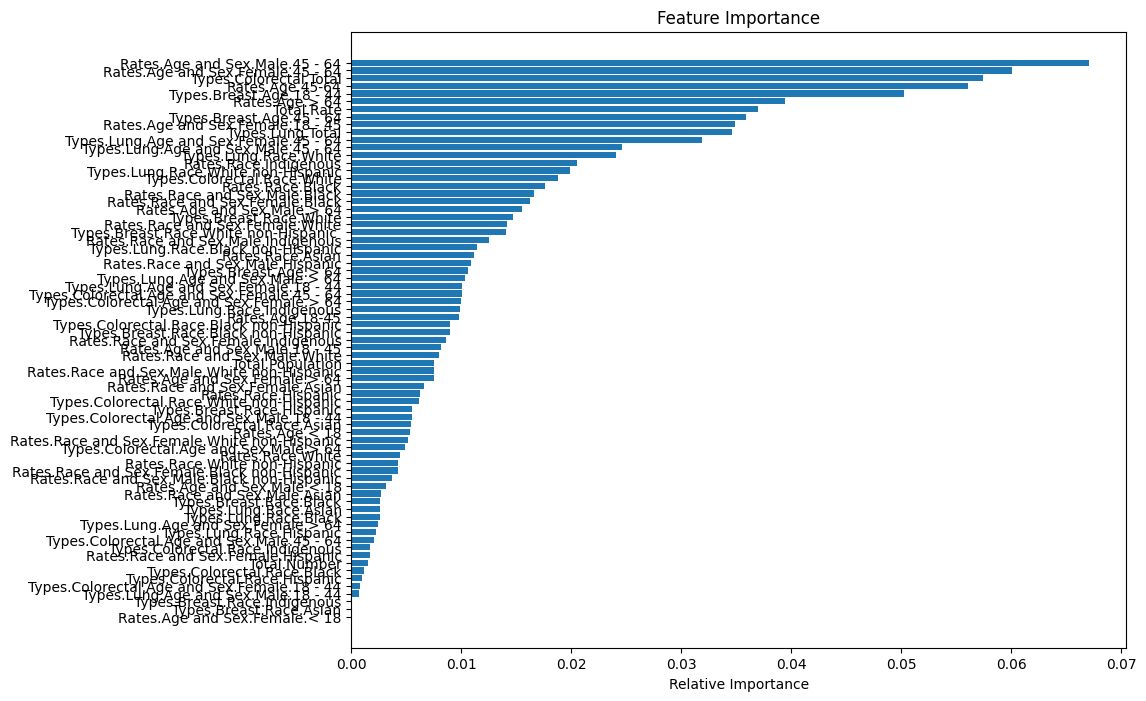

In [6]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset
df = pd.read_csv('cancer.csv')

# 3. Explore Data
print(df.head())
print(df.info())
# print(df['diagnosis'].value_counts()) # Commenting out the problematic line

# 4. Encode Target Variable
# Using 'Types.Breast.Total' as the target and creating a binary variable
median_breast_cancer_rate = df['Types.Breast.Total'].median()
df['breast_cancer_class'] = (df['Types.Breast.Total'] > median_breast_cancer_rate).astype(int)

# 5. Define Features and Target
X = df.drop(['State', 'Types.Breast.Total', 'breast_cancer_class'], axis=1, errors='ignore')
y = df['breast_cancer_class']

# 6. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 8. Predict
y_pred = model.predict(X_test)

# 9. Evaluate
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 10. Feature Importance Plot
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Print the column names to identify the correct target variable
# print(df.columns) # Commenting out as columns are already printed above